# Calculations for typesetting controls

This notebook will do calculations based on existing paper to learn how other people set figure size, figure text size in various layouts.

## 1. PRL

Learn from PRL 123, 218001 (2019)

**Column width**

- total width of paper: 1336 px (8.5 in)
- column width of paper: 528 px
- one-column figure width: 508 px
- two-panel in one-column, the width of each panel: 246 px

**height**

- figure height: 196 px (slightly smaller than panel width)

**text**

Text is a bit smaller than that in main text.

- in figure text: 14 px
- caption text: 17 px
- main text: 20 px

**dpi**

dpi of main text can be obtained from total width of paper and pixel size of text. 

With these observations in mind we can start doing some tuning in matplotlib to make better control of the output graph.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [38]:
# matplotlib configs
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['text.usetex'] = True 

matplotlib.rcParams['axes.labelpad'] = 1.0
matplotlib.rcParams['axes.linewidth'] = 0.5

matplotlib.rcParams['xtick.labelsize'] = 'small'
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.major.size'] = 2.5
matplotlib.rcParams['xtick.minor.size'] = 1.6

matplotlib.rcParams['ytick.labelsize'] = 'small'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['ytick.minor.visible'] = True
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['ytick.major.size'] = 2.5
matplotlib.rcParams['ytick.minor.size'] = 1.6

In [21]:
matplotlib.matplotlib_fname()

'E:\\anaconda\\miniconda\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

**Use a dictionary to save these presettings**

Structure: dictionary keys will be the figure type, e.g. 2-column-4-panel, 1-column-2-panel, etc. Each item will be a tuple of (height, width, dpi) which can then be used to initialize a mpl.Figure.

In [40]:
presets = {}
presets['1-column-2-panel'] = (1.25, 1.57, 157)
presets['1-column-1-panel'] = (1.25, 3.2, 157)

In [39]:
508/1336*8.5

3.2320359281437128

**A test figure**

In [35]:
x = range(0, 100)
y = np.random.randn(100)

Text(0, 0.5, '$y$')

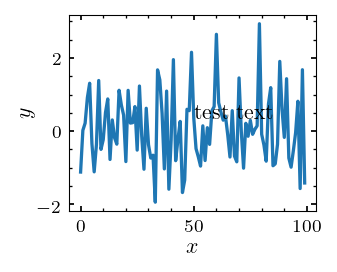

In [36]:
h, w, dpi = presets['1-column-2-panel']
fig = plt.figure(figsize=(w, h), dpi=dpi)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y)
ax.text(x[50], y[50], 'test text')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')